In [177]:
from functions import *

from tqdm import tqdm
import matplotlib.pyplot as plt

In [178]:
n = 5
J = generate_random_J(n)
h = generate_random_h(n)
m = IsingModel(J,h)

In [179]:
def get_proposal_mat_quantum(m, gamma=0.7, t=1):
    '''Get a quantum proposal matrix for a given Ising model.'''
    H_zz = sum([-m.J_rescaled[i,j]*Z(i,n) @ Z(j,n) for i in range(n) for j in range(i+1,n)]) # note that the factor 1/2 is not needed here
    H_z = sum([-m.h_rescaled[i]*Z(i,n) for i in range(n)])
    H_x = sum([X(i,n) for i in range(n)])
    H = (1-gamma) *(H_zz + H_z) + gamma*H_x
    proposal_mat = np.zeros((2**m.n, 2**m.n))
    for s in range(2**m.n):
        out_state = sparse_la.expm_multiply(-1j * H * t, get_basis_state(s,m.n))
        transitions = [np.abs(a)**2 for a in out_state]
        proposal_mat[:,s] = transitions
    return proposal_mat

In [180]:
T_arr = np.geomspace(0.01, 100, 10)
delta_random_arr = []
delta_local_arr = []
delta_quantum_arr = []
m = IsingModel(J,h)

for T in tqdm(T_arr):
    m.T = T
    proposal_mat_random = get_proposal_mat_random(m)
    P_random = get_transition_matrix(m, proposal_mat_random)
    delta_random = get_delta(P_random)
    delta_random_arr.append(delta_random)

    proposal_mat_local = get_proposal_mat_local(m)
    P_local = get_transition_matrix(m, proposal_mat_local)
    delta_local = get_delta(P_local)
    delta_local_arr.append(delta_local)

    proposal_mat_quantum = get_proposal_mat_quantum(m)
    P_quantum = get_transition_matrix(m, proposal_mat_quantum)
    delta_quantum = get_delta(P_quantum)
    delta_quantum_arr.append(delta_quantum)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


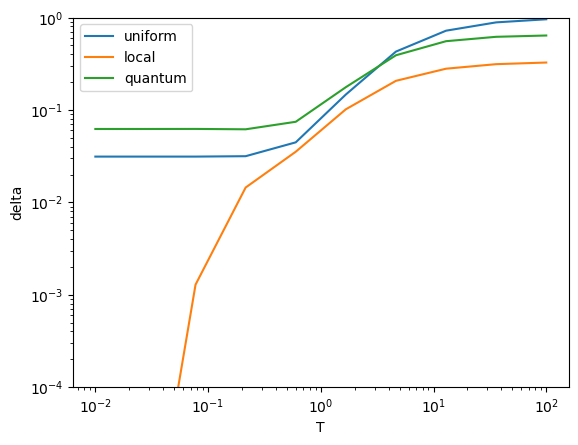

In [181]:
plt.loglog(T_arr, delta_random_arr, label = 'uniform')
plt.loglog(T_arr, delta_local_arr, label = 'local')
plt.loglog(T_arr, delta_quantum_arr, label = 'quantum')
plt.xlabel('T')
plt.ylabel('delta')
plt.ylim(0.0001, 1)
plt.legend()